In [51]:
import pandas as pd
import numpy as np

activities = pd.read_csv("./../../data/activitats.csv", encoding='ISO-8859-1')
marks = pd.read_csv("./../../data/notes.csv", delimiter=';')
submision = pd.read_csv("./../../data/trameses.csv")


In [27]:
marks.head()

,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
0,176,92,NaN,NaN,"9,25",1667829600,NaN,1675173600
1,179,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
2,168,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
3,401,92,NaN,NaN,"3,50",1667829600,"8,25",1675173600
4,482,92,NaN,NaN,"7,00",1667829600,NaN,1675173600


Academic Record

In [47]:
def Academic_Record(user_id):
    marks_user = marks[(marks["userid"] == user_id)]

    #Transforma los formatos de fecha UNIX
    marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date

    #Obtiene la nota y fecha de convocatoria finales (se actualiza la nota final en caso de hacerse recuperacion)
    marks_user['Nota_Final'] = np.where(marks_user['R_Grade'].notna(), marks_user['R_Grade'], marks_user['F_Grade'])
    marks_user['Fecha_Final'] = np.where(marks_user['R_Grade'].notna(), marks_user['R_Grade_Date'], marks_user['F_Grade_Date'])

    #Filtra los campos finales
    marks_user_record = marks_user[["aula_id", "Nota_Final", "Fecha_Final"]]

    return marks_user_record

In [39]:
Academic_Record(155)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2022, 11, 7) datetime.date(2023, 11, 13)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2023, 1, 31) datetime.date(2024, 1, 25)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2348586516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,aula_id,Nota_Final,Fecha_Final
34,92,"5,75",2022-11-07
352,143,"8,65",2023-11-13


Datos asignatura y user id

In [45]:
def Academic_Record_Subject(user_id, aula_id):
    marks_user = marks[(marks["userid"] == user_id)]

    #Transforma los formatos de fecha UNIX
    marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
    marks_user.loc[:,'R_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'R_Grade_Date'], unit='s').dt.date

    return marks_user[marks["aula_id"] == aula_id]

In [48]:
Academic_Record_Subject(155, 92)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['NaT', 'NaT']
Length: 2, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'P_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'P_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[datetime.date(2022, 11, 7) datetime.date(2023, 11, 13)]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  marks_user.loc[:,'F_Grade_Date'] = pd.to_datetime(marks_user.loc[:,'F_Grade_Date'], unit='s').dt.date
C:\Users\Aleix\AppData\Local\Temp\ipykernel_8884\2234939358.py:7: FutureWarning: Setting an item of incompatible dtype is dep

,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
34,155,92,NaN,NaT,"5,75",2022-11-07,NaN,2023-01-31


Academic Record Stats

In [221]:
def stats_Academic_Record_Mean_Marks(user_id):
    submissions = pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat', "activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]

    submissions_user = submissions[submissions["userid"] == user_id]
    return submissions_user["mark"].mean()

In [222]:
stats_Academic_Record_Mean_Marks(user_id)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\1849012263.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv("./../../data/dataset.csv")


0.9445128205128206

In [238]:
def stats_Academic_Record_Mean_Final_Grade(user_id):
    submissions = pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'F_Grade', 'R_Grade']].drop_duplicates()
    submissions


    submissions_user = submissions[submissions["userid"] == user_id]
    # Crea la columna 'Nota_Final' basant-se en la condició donada
    submissions_user['Nota_Final'] = np.where(submissions_user['R_Grade'].notna(), submissions_user['R_Grade'], submissions_user['F_Grade'])

    submissions_user = submissions_user.dropna(subset=['Nota_Final'])

    return submissions_user["Nota_Final"].mean()

stats_Academic_Record_Mean_Final_Grade(user_id)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\3054736579.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv("./../../data/dataset.csv")
C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\3054736579.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submissions_user['Nota_Final'] = np.where(submissions_user['R_Grade'].notna(), submissions_user['R_Grade'], submissions_user['F_Grade'])


7.2

Tablas Trameses

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

def pie_chart_submissions_user(user_id):
    fontsize = 18
    submissions = pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat', "activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]

    submissions_user = submissions[submissions["userid"] == user_id]

    conteo_por_aula = submissions_user.groupby('aula_id').size()
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    conteo_por_aula = submissions_user.groupby('aula_id').size()
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    if 'conteo_registros' in submissions_user.columns:
        submissions_user = submissions_user.drop(columns=['conteo_registros'])

    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    suma_valores_distintos = submissions_user['diferencia'].unique().sum()

    count_mark_1 = (submissions_user['mark'] == 1).sum()
    count_mark_0 = (submissions_user['mark'] == 0).sum()
    count_between_0_and_1 = ((submissions_user['mark'] > 0) & (submissions_user['mark'] < 1)).sum()

    sizes = [count_mark_1, count_between_0_and_1, count_mark_0, suma_valores_distintos]
    labels = ['10', 'Other', '0', 'NaN']
    colors = ['#8BC34A', '#FFC107', '#FF4C4C', '#696969']  # Verde, rojo, amarillo, gris oscuro (DimGray)

    # Crear el gráfico circular con ajustes para evitar superposición
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': fontsize},
        labeldistance=1.1,      # Alejar las etiquetas del centro
        pctdistance=.7  # Ajustar la posición de los porcentajes
    )

    plt.axis('equal')

    
    return plt



C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\2142514871.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv("./../../data/dataset.csv")


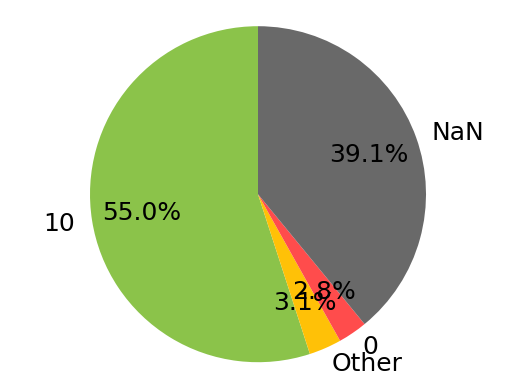

In [207]:
pie_chart_submissions_user(155).show()

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

def pie_chart_submissions_user_aula(user_id, aula_id):
    fontsize = 18
    submissions = pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat', "activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]

    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user = submissions_user[submissions_user["aula_id"] == aula_id]

    conteo_por_aula = submissions_user.groupby('aula_id').size()
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()
    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    # Paso 2: Contar registros por aula_id y agregarlo como columna 'conteo_registros'
    conteo_por_aula = submissions_user.groupby('aula_id').size()
    conteo_por_aula = conteo_por_aula.rename('conteo_registros').reset_index()

    if 'conteo_registros' in submissions_user.columns:
        submissions_user = submissions_user.drop(columns=['conteo_registros'])

    submissions_user = submissions_user.merge(conteo_por_aula, on='aula_id', how='left')
    submissions_user['diferencia'] = submissions_user['count_activities'] - submissions_user['conteo_registros']

    suma_valores_distintos = submissions_user['diferencia'].unique().sum()
    
    count_mark_1 = (submissions_user['mark'] == 1).sum()
    count_mark_0 = (submissions_user['mark'] == 0).sum()
    count_between_0_and_1 = ((submissions_user['mark'] > 0) & (submissions_user['mark'] < 1)).sum()

    sizes = [count_mark_1, count_between_0_and_1, count_mark_0, suma_valores_distintos]
    labels = ['10', 'Other', '0', 'NaN']
    colors = ['#8BC34A', '#FFC107', '#FF4C4C', '#696969']  # Verde, rojo, amarillo, gris oscuro (DimGray)

    # Crear el gráfico circular con fontsize aplicado
    plt.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': fontsize},
        pctdistance=.7 
    )

    plt.axis('equal')

    
    return plt


C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\1924058255.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions = pd.read_csv("./../../data/dataset.csv")


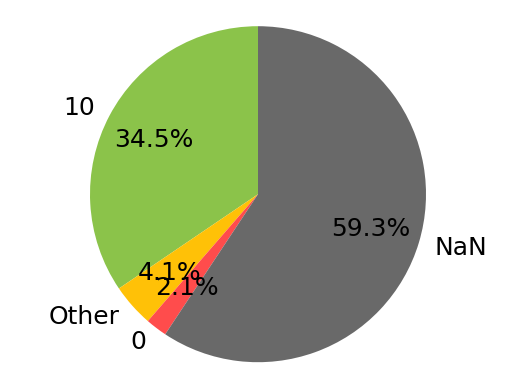

In [209]:
pie_chart_submissions_user_aula(155, 92).show()

Num Activities Submitted and Average Mark

In [143]:
def stats_submitions(user_id, aula_id):
    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]


    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user = submissions_user[ submissions_user["aula_id"] == aula_id]
    submissions_user

    # Número de registros en submissions_user
    num_registros = len(submissions_user)

    # Promedio de la columna 'mark'
    average_mark = submissions_user['mark'].mean()

    # Crear un array con los resultados
    resultado = np.array([num_registros, average_mark])

    # Mostrar el resultado
    return resultado


In [144]:
stats_submitions(user_id, aula_id)

C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\2936716400.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


array([59.        ,  0.93610169])

Grafica Submittions

In [212]:
def submition_temporal_graph(user_id, aula_id):
    import matplotlib.dates as mdates
    fontsize = 18

    submissions =  pd.read_csv("./../../data/dataset.csv")
    submissions = submissions[['userid', 'aula_id', 'activitat',"activitat_id", 'datesubmitted', 'attempt_number', 'mark', 'count_activities']]


    submissions_user = submissions[submissions["userid"] == user_id]
    submissions_user = submissions_user[ submissions_user["aula_id"] == aula_id]

    # Convertir la columna 'datesubmitted' a formato de fecha (sin horas)
    submissions_user['datesubmitted'] = pd.to_datetime(submissions_user['datesubmitted']).dt.date

    # Agrupar por 'datesubmitted' y sumar los valores de 'attempt_number'
    submissions_agrupado = submissions_user.groupby('datesubmitted', as_index=False)['attempt_number'].sum()

    # Crear el gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(submissions_agrupado['datesubmitted'], submissions_agrupado['attempt_number'], marker='o', linestyle='-', color='#c09268', linewidth=3)

    # Personalizar el gráfico para un estilo minimalista

    plt.xlabel('', fontsize=fontsize)
    plt.ylabel('Submitions', fontsize=fontsize)
    plt.xticks(rotation=45, fontsize = fontsize)
    plt.yticks(np.arange(0, submissions_agrupado['attempt_number'].max() + 1, 5), fontsize= fontsize)

    # Formato de la fecha en el eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))

    # Ocultar bordes no deseados
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)

        # Ajustar y mostrar el gráfico
    plt.tight_layout()
    return plt


C:\Users\Aleix\AppData\Local\Temp\ipykernel_7204\4191871996.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  submissions =  pd.read_csv("./../../data/dataset.csv")


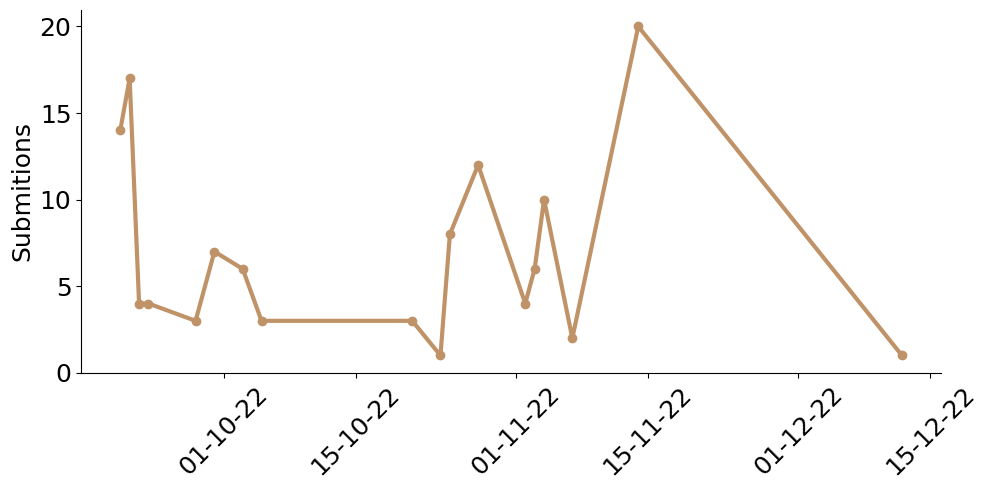

In [213]:
submition_temporal_graph(user_id, aula_id).show()